In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

In [114]:
data = pd.read_csv('execution_times.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


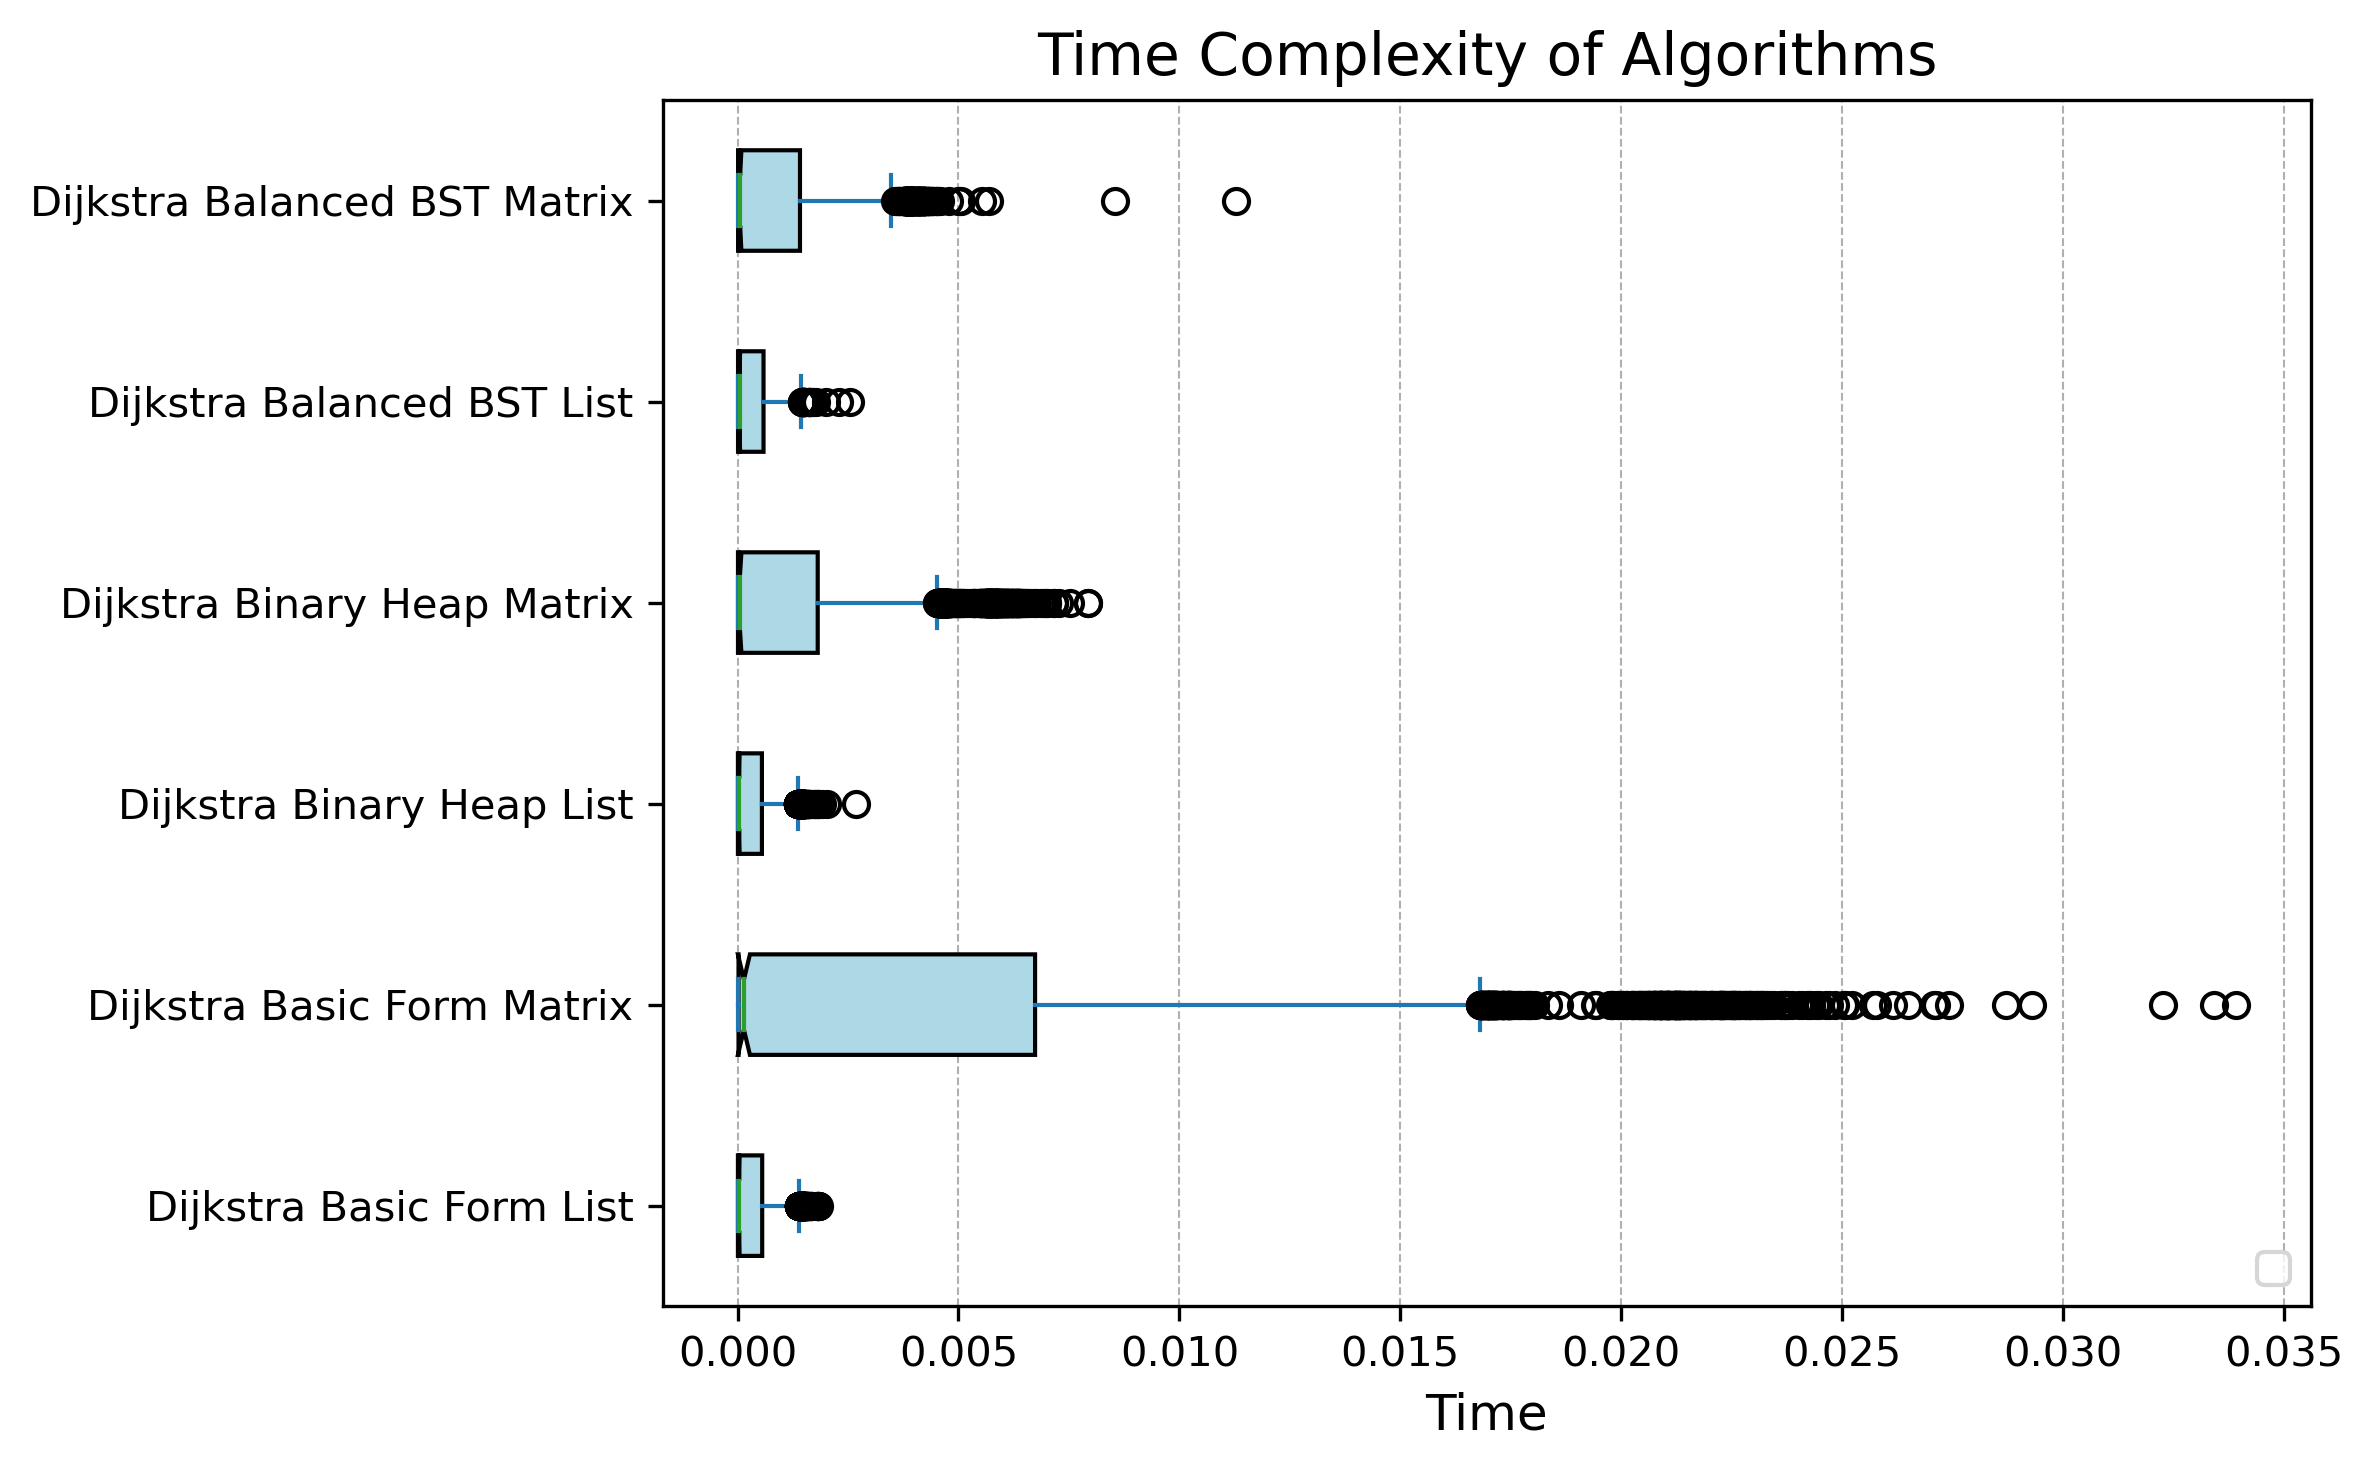

In [124]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

colors = ['#007ACC', '#00A878', '#FFB000', '#FF4500', '#6A5ACD']  

data[[i for i in data.columns if i not in ['Graph Size', 'Density']]].plot.box(
    ax=ax, notch=True, vert=False, patch_artist=True,
    boxprops=dict(facecolor='lightblue', edgecolor='black')  
)

for i, box in enumerate(ax.artists):
    box.set_facecolor(colors[i % len(colors)]) 

plt.xlabel('Time', fontsize=12)
plt.title('Time Complexity of Algorithms', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', linewidth=0.5)

plt.legend(fontsize=10, loc='lower right')

plt.tight_layout()
plt.show()

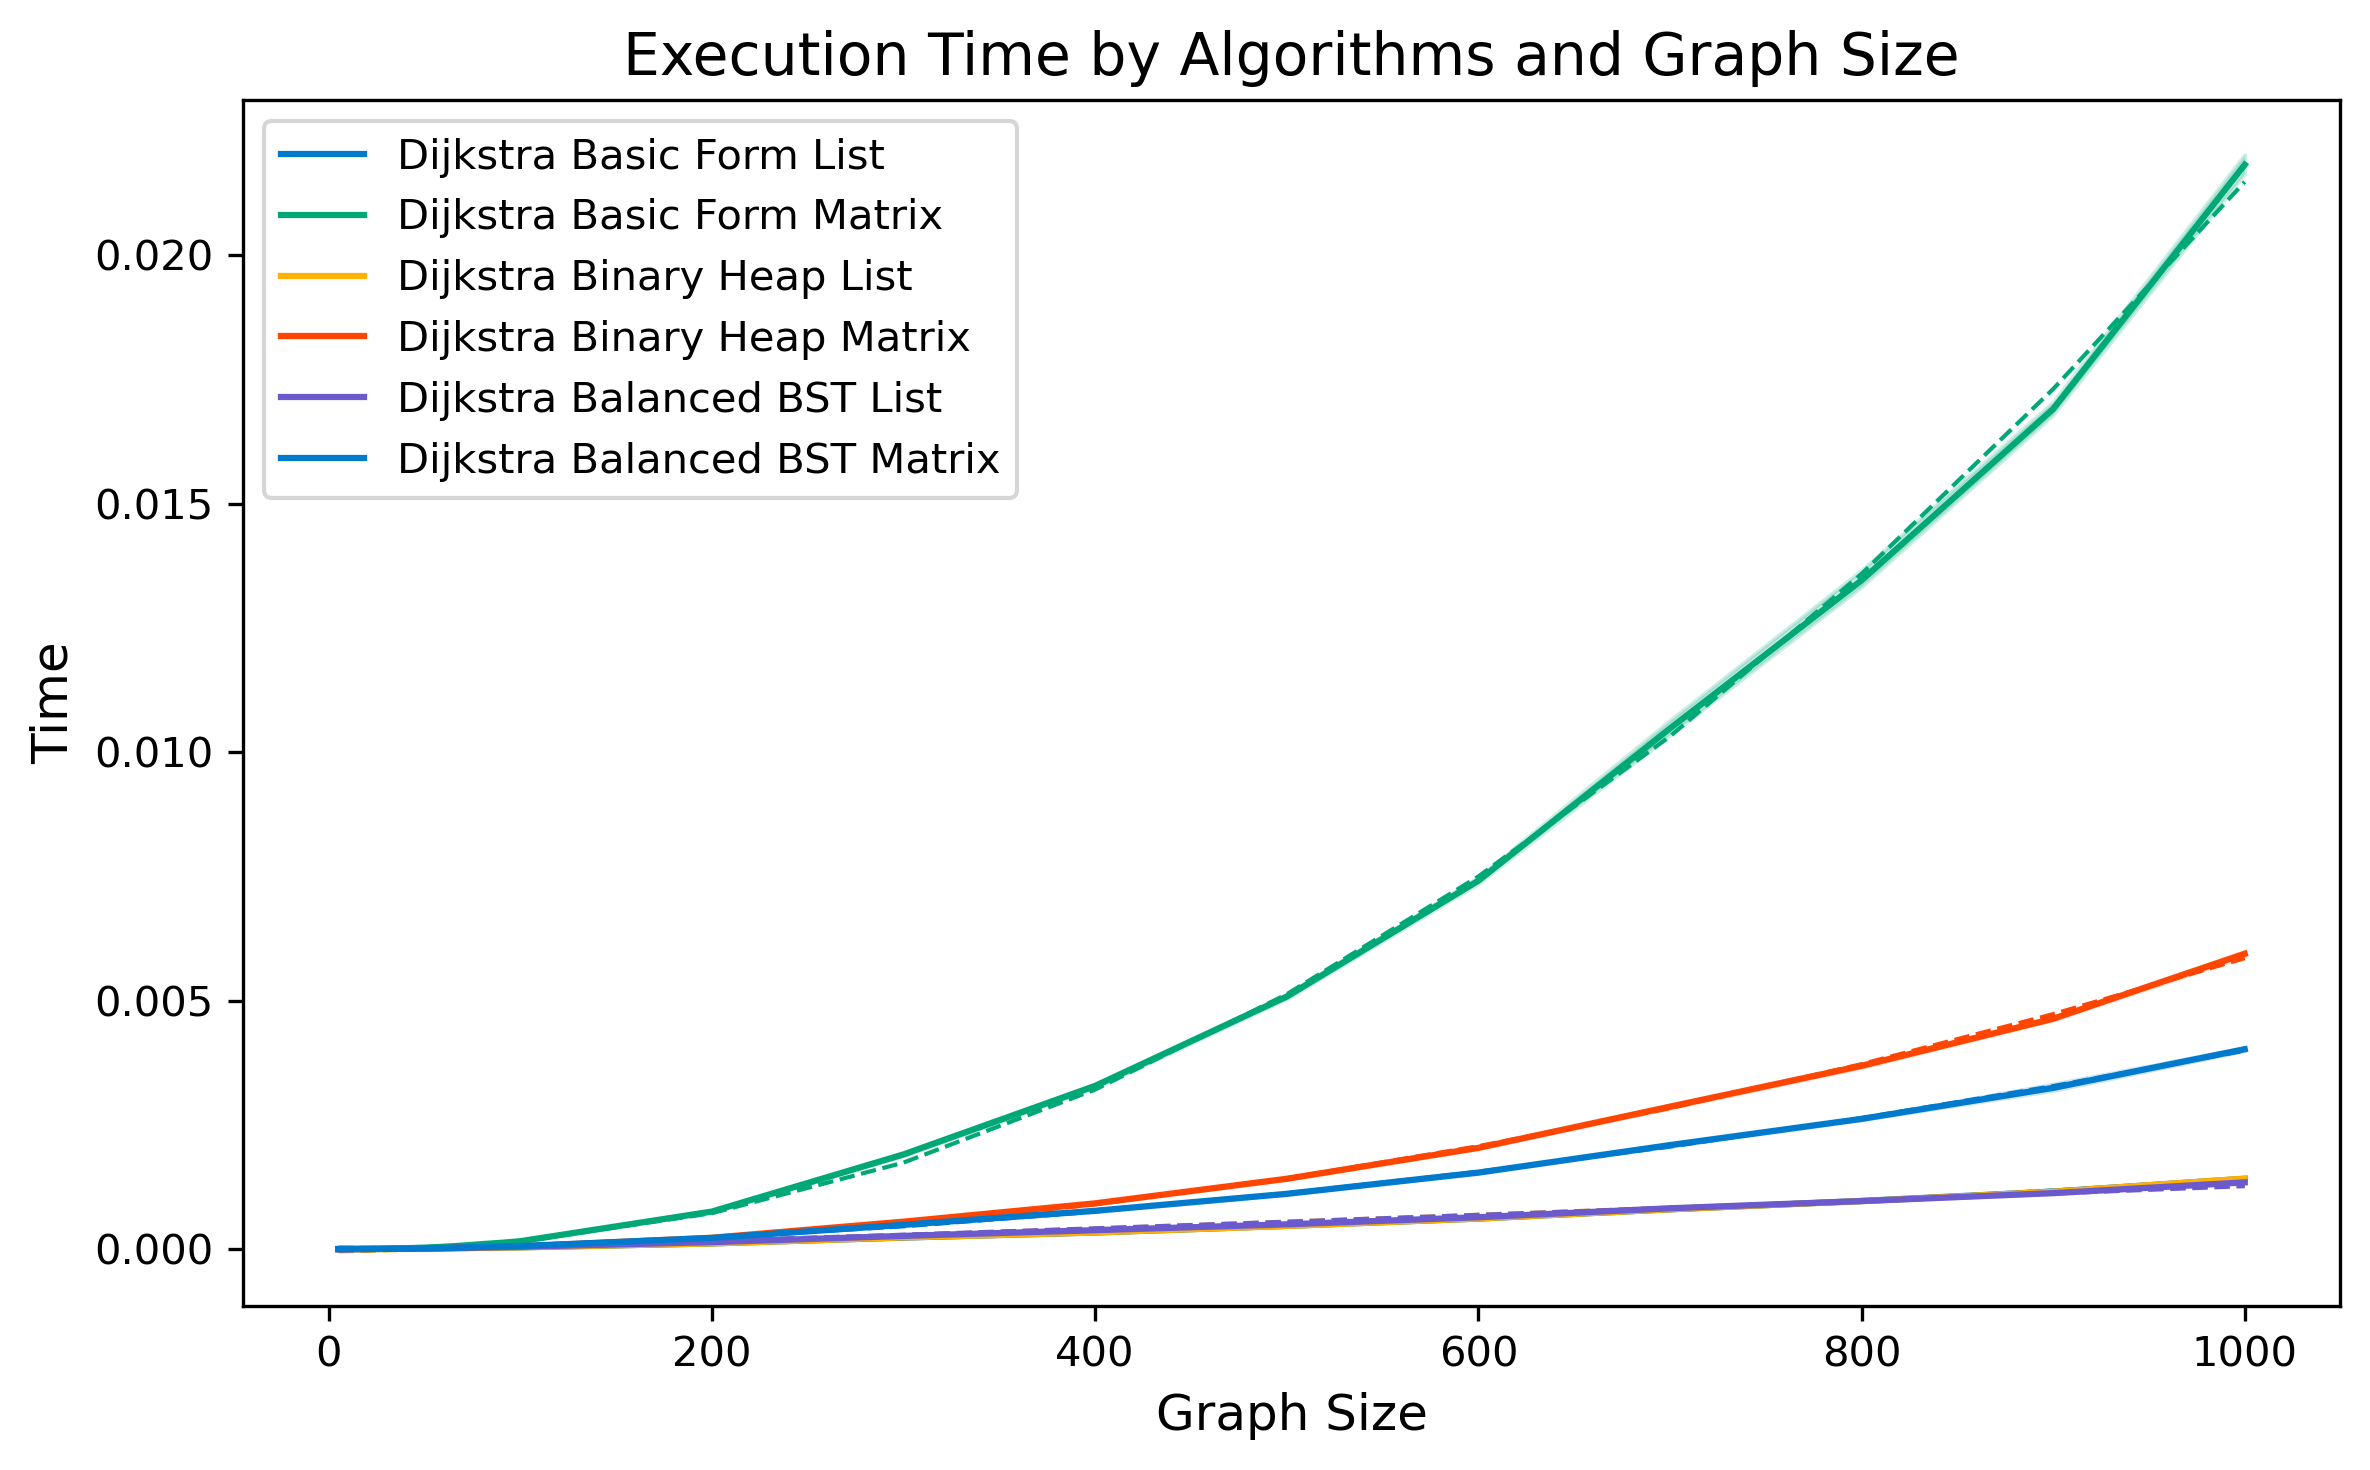

In [123]:
cols = [i for i in data.columns if i not in ['Graph Size', 'Density']]
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

for i, col in enumerate(cols):
    sns.lineplot(data=data, x='Graph Size', y=col, ax=ax, label=col, linestyle="-", color=colors[i % len(colors)])

    # data preparation for the model fitting
    X = data['Graph Size'].values.reshape(-1, 1)
    y = data[col].values

    if 'Matrix' in col:
        # For adjacency matrix, use polynomial regression of degree 2 (n^2 complexity)
        model = make_pipeline(PolynomialFeatures(2), LinearRegression())
    elif 'Basic' in col:
        # For adjacency list with basic form, use polynomial regression of degree 2 (n^2 complexity)
        model = make_pipeline(PolynomialFeatures(2), LinearRegression())
    else:
        # For adjacency list with heap or BST, use n log(n) as feature
        X = X * np.log(X)
        model = LinearRegression()

    model.fit(X, y)
    y_pred = model.predict(X)

    ax.plot(data['Graph Size'], y_pred, linestyle='--', linewidth=1, color=colors[i % len(colors)])

plt.xlabel('Graph Size', fontsize=12)
plt.ylabel('Time', fontsize=12)
plt.title('Execution Time by Algorithms and Graph Size', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=10)

plt.tight_layout()
plt.show()